In [64]:
import re
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
# Starndard libraries
# For fun
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.stem import WordNetLemmatizer
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.decomposition import NMF
pd.options.display.max_colwidth = 200
from nltk.stem import WordNetLemmatizer 
from sklearn import svm
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, permutation_test_score
from sklearn.manifold import TSNE
import itertools
from collections import Counter
from IPython.display import Image
from sklearn.metrics import mean_squared_error
from itertools import permutations

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\amcfa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [65]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
users = pd.read_csv('users.csv')
movies = pd.read_csv('movies.csv')

In [66]:
df = pd.concat([train_df, movies], axis="columns", join = 'inner')
y_true = df.pop('rating')
df2=df.drop('title', axis =1, inplace = True)

In [67]:
df

,uID,mID,mID,year,Doc,Com,Hor,Adv,Wes,Dra,...,Chi,Cri,Thr,Sci,Mys,Rom,Fil,Fan,Act,Mus
0,744,1210,1,1995,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,3040,1584,2,1995,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
2,1451,1293,3,1995,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,5455,3176,4,1995,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,2507,3074,5,1995,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,5435,2858,3948,2000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,392,2716,3949,2000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3880,2,1527,3950,2000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3881,3760,474,3951,2000,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [79]:
X_train,X_test,Y_train,Y_test = train_test_split(df,y,test_size=0.2,random_state=20)
vectorizer = TfidfVectorizer(decode_error ='ignore').fit(X_train)

train = vectorizer.transform(X_train)
valid = vectorizer.transform(X_test)

In [80]:

def model(par1,par2):
	matrixm = NMF(init='nndsvdar',beta_loss = par1,solver = par2, n_components=5,max_iter =500,
	random_state=1)
	return matrixm
def predict(matrix):
	sortedm = np.argsort(matrix)
	n_predictions, maxval = sortedm.shape
	subjs = np.empty(n_predictions, dtype = np.int64)
	predictions = [[sortedm[i][maxval - 1]] for i in range(n_predictions)]
	for i in range(n_predictions):
		subjs[i] = predictions[i][0]
	return subjs
def label_permute(ytrue, ypred, perm_list, n=5):
    unique = np.unique(ytrue)
    perm = permutations(perm_list)
    accuracym = [(i, accuracy_score(np.where(ytrue == k, p[j], ytrue), ypred))
                 for i, p in enumerate(perm) for j, k in enumerate(unique)]
    maxval = max(accuracym, key=lambda x: x[1])
    return maxval

In [81]:
labels = [0,1,2,3,4]

m = model("frobenius", "cd").fit(X_train)

print(m.reconstruction_err_,"That error is very high")
y_pred = predict(m.transform(X_test))
y_pred = list(y_pred)
label_order, accuracy = label_permute(Y_test, y_pred,labels)
print(accuracy)
mean_squared_error(Y_test,y_pred)

113.26089978362009 That error is very high
0.25611325611325614


8.218790218790218

In [82]:
labels = [0,1,2,3,4]

m = model("frobenius", "cd").fit(X_train)

print(m.reconstruction_err_,"That error is very high")
y_pred = predict(m.transform(X_test))
y_pred = list(y_pred)
label_order, accuracy = label_permute(Y_test, y_pred,labels)
print(accuracy)
mean_squared_error(Y_test,y_pred)

113.26089978362009 That error is very high
0.25611325611325614


8.218790218790218

In [83]:
labels = [0,1,2,3,4]

m = model("frobenius", "mu").fit(X_train)

print(m.reconstruction_err_,"That error is very high")
y_pred = predict(m.transform(X_test))
y_pred = list(y_pred)
label_order, accuracy = label_permute(Y_test, y_pred,labels)
print(accuracy)
mean_squared_error(Y_test,y_pred)

1595.8293844427508 That error is very high
0.1956241956241956


c:\gitfiles\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


7.848133848133848

In [73]:
from sklearn.cluster import KMeans
import numpy as np


In [91]:


kmeans = KMeans(n_clusters=10, random_state=0, n_init="auto").fit(X_train)
#kmeans.cluster_centers_

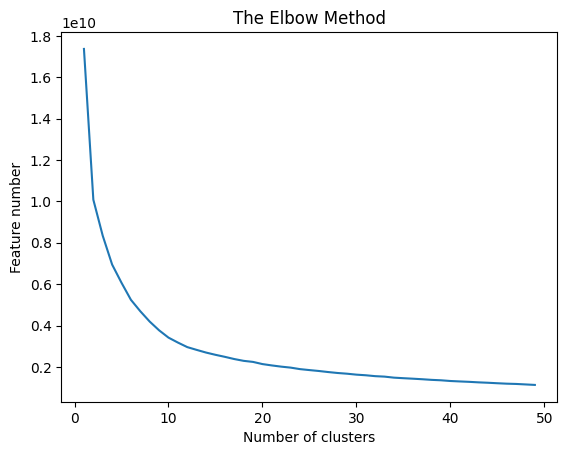

In [87]:
from sklearn.cluster import KMeans
abcd = []
for i in range(1,50):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X_train)
    abcd.append(kmeans.inertia_)
plt.plot(range(1,50),abcd)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Feature number')
plt.show()

In [98]:
y = Y_train

labels = kmeans.labels_
correct_labels = sum(y == labels)
correct_labels


14042

In [99]:
labels = [0,1,2,3,4]

m = model("frobenius", "mu").fit(X_train)

print(m.reconstruction_err_,"That error is very high")
y_pred = predict(m.transform(X_test))
y_pred = list(y_pred)
label_order, accuracy = label_permute(Y_test, y_pred,labels)
print(accuracy)
mean_squared_error(Y_test,y_pred)

1595.8293844427508 That error is very high
0.1956241956241956


c:\gitfiles\Lib\site-packages\sklearn\decomposition\_nmf.py:1710: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


7.848133848133848